<a href="https://colab.research.google.com/github/SaraAljuraybah/Data-Mining-Project/blob/main/Reports/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2: Data Summarization and Pre-processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
df = pd.read_excel("Raw_dataset.xlsx")
print("Shape:", df.shape)
df.head()

Shape: (3028, 47)


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0


# 1 . Data Analysis
****
**1.1 Statical Summary**

In [ ]:
df.describe()


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
count,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,...,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000
mean,18.352378,1.424042,2.205086,1.476222,0.445178,0.782034,0.468296,0.524108,0.233157,0.625495,...,0.529723,1.244055,0.971268,3.469617,3.078930,3.243065,3.338111,2.950198,3.640819,3.215984
std,2.058045,0.502235,0.874640,0.619389,0.497068,0.454810,0.534244,0.499501,0.422911,0.484075,...,0.507728,1.674212,1.644333,1.589963,1.507621,1.555822,1.394496,1.482595,0.971860,1.011929
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.200000,3.000000,2.600000
50%,18.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,3.800000,3.000000,3.800000,3.200000
75%,19.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,4.600000,4.000000,4.400000,4.000000
max,48.000000,4.000000,5.000000,3.000000,1.000000,11.000000,11.000000,1.000000,1.000000,1.000000,...,2.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000


The statistical summary provides an overview of the dataset. For example, the Age attribute shows an average of around 18 years, which is reasonable since the dataset represents undergraduate students. However, the maximum value of 48 years indicates the presence of an outlier that should be considered during preprocessing.

Some attributes such as Gender and Name of College are shown as numerical values in the summary, but in reality, they are categorical features that have been encoded using numbers. Therefore, their mean and standard deviation are not meaningful and should be interpreted through frequency counts instead.

**1.2 Missing values**

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Year of Study,0
Name of College,0
Use Facebook,0
Use Instagram,0
Use Twitter,0
Use Snapchat,0
Use LinkedIn,0
Use Tiktok,0



The missing values analysis shows that there are no null or missing entries in the dataset. This is an advantage since it ensures the dataset is complete and reduces the need for imputation or dropping rows/columns. Having a complete dataset allows us to focus on other preprocessing tasks such as handling outliers, encoding categorical features, and normalization.


**1.3 Plots**
- Histogram (Age)

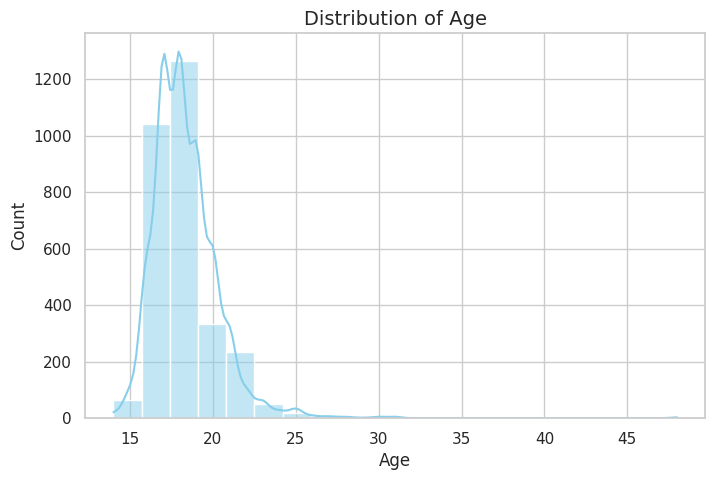

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The histogram above shows the distribution of students’ ages. Most students are between 17 and 20 years old, which is expected for undergraduate levels. The data is slightly right-skewed, meaning there are a few older participants aged above 25. This pattern confirms that the dataset mainly represents young students, while the presence of older ages (up to 48) might indicate outliers that should be checked during the preprocessing phase.



- Boxplot (Age)

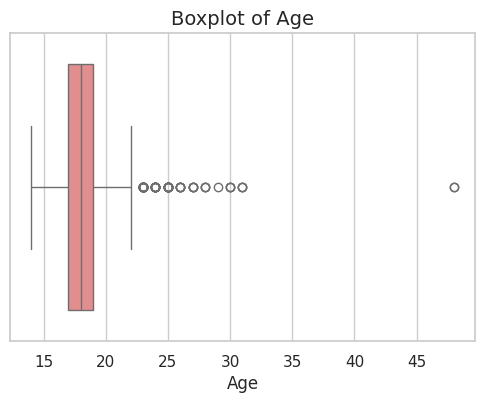

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"], color="lightcoral")
plt.title("Boxplot of Age", fontsize=14)
plt.xlabel("Age")
plt.show()


The boxplot of the Age attribute shows that the majority of students are between 17 and 20 years old, with a median age of 18. Several outliers are present, including values above 25 and one extreme case at 48 years, which may indicate data entry errors or older students. These outliers should be carefully considered during preprocessing.

- Barplot (gender)


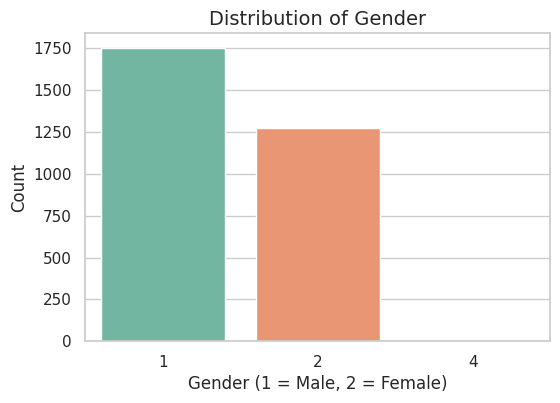

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Gender", palette="Set2", legend=False)
plt.title("Distribution of Gender", fontsize=14)
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.show()


The bar plot of the Gender attribute shows the distribution of male and female students. The dataset indicates that there are more male students compared to female students. However, the appearance of an unexpected value (4) suggests the presence of data entry or coding errors that need to be addressed during preprocessing.

**1.4 Class label distribution**

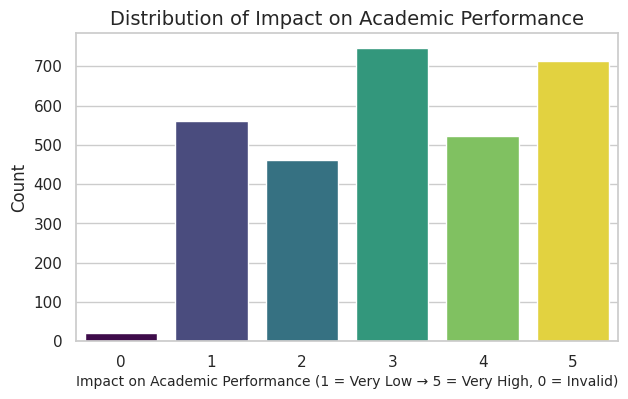

Impact on Academic Performance
3    747
5    713
1    561
4    523
2    462
0     22
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Impact on Academic Performance", hue="Impact on Academic Performance", palette="viridis", legend=False)
plt.title("Distribution of Impact on Academic Performance", fontsize=14)
plt.xlabel("Impact on Academic Performance (1 = Very Low → 5 = Very High, 0 = Invalid)", fontsize=10)
plt.ylabel("Count")
plt.show()

print(df["Impact on Academic Performance"].value_counts())


The plot shows the distribution of the class label Impact on Academic Performance. Most students fall between levels 2 to 5, with the highest counts at level 3 (747) and level 5 (713). Fewer students are at levels 1 (561) and 2 (462), while only 22 invalid entries (0) were detected. These invalid values will need to be handled during preprocessing.

# 2. Data Pre-processing
****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_raw = pd.read_excel("Raw_dataset.xlsx")
df=df_raw.copy()
print("shape:",df.shape)
df.head()

shape: (3028, 47)


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0


**2.1 Duplicates Removal (Cleaning data)**

In [3]:
 #first we cheak for duplicates
dup_count = df.duplicated().sum()
print("Number of duplicates: ",dup_count)

print("Shape before removing duplicates: ", df.shape)
#removing the duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates: ", df.shape)

Number of duplicates:  166
Shape before removing duplicates:  (3028, 47)
Shape after removing duplicates:  (2862, 47)


- We detected 166 duplicate rows and removed them using drop_duplicates(). This step prevents redundancy and ensures each record is unique. Result: Dataset reduced from 3028 to 2862 rows

- First we checked unique values
- Detecting invalid values is important to correct data entry errors and improve reliability

- Result: Marked invalid values for cleaning in the next step



In [ ]:
discret= 'Age'
numOfBins=3
df['discretized'] =pd.cut(df[discret], bins=numOfBins, labels=False)
print(df[['Age', 'discretized']])


      Age  discretized
0      16            0
1      19            0
2      18            0
3      20            0
4      20            0
5      21            0
6      18            0
7      18            0
8      18            0
9      16            0
10     18            0
11     19            0
12     20            0
13     18            0
14     17            0
15     18            0
16     19            0
17     18            0
18     18            0
19     20            0
20     17            0
21     17            0
22     17            0
23     20            0
24     18            0
25     21            0
26     18            0
27     21            0
28     17            0
29     19            0
30     17            0
31     17            0
32     18            0
33     21            0
34     17            0
35     20            0
36     17            0
37     19            0
38     18            0
39     17            0
40     18            0
41     17            0
42     17  

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)

log_columns=['Frequency of Use','Age']

for col in log_columns:
   df.loc[:, col+'_log']=np.log1p(df[col])

print(df[['Age','Age_log', 'Frequency of Use', 'Frequency of Use_log']])


      Age   Age_log  Frequency of Use  Frequency of Use_log
0      16  2.833213                 2              1.098612
1      19  2.995732                 1              0.693147
2      18  2.944439                 1              0.693147
3      20  3.044522                 1              0.693147
4      20  3.044522                 3              1.386294
5      21  3.091042                 5              1.791759
6      18  2.944439                 4              1.609438
7      18  2.944439                 1              0.693147
8      18  2.944439                 1              0.693147
9      16  2.833213                 1              0.693147
10     18  2.944439                 3              1.386294
11     19  2.995732                 3              1.386294
12     20  3.044522                 3              1.386294
13     18  2.944439                 3              1.386294
14     17  2.890372                 3              1.386294
15     18  2.944439                 1   

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)

df['Time_spent_sqrt']=np.sqrt(df['Time Spent'])
print(df[['Time Spent', 'Time_spent_sqrt']])

      Time Spent  Time_spent_sqrt
0              1         1.000000
1              1         1.000000
2              1         1.000000
3              4         2.000000
4              2         1.414214
5              1         1.000000
6              2         1.414214
7              3         1.732051
8              3         1.732051
9              2         1.414214
10             2         1.414214
11             1         1.000000
12             1         1.000000
13             1         1.000000
14             2         1.414214
15             3         1.732051
16             4         2.000000
17             2         1.414214
18             3         1.732051
19             3         1.732051
20             4         2.000000
21             4         2.000000
22             4         2.000000
23             1         1.000000
24             1         1.000000
25             4         2.000000
26             3         1.732051
27             2         1.414214
28            

**2.2 Invalid Values Detection (Cleaning data)**

In [ ]:
#invalid values
print("Unique values in Gender: ",df["Gender"].unique())
print("Unique values in Use Instagram: ",df["Use Instagram"].unique())
print("Unique values in Impact on Academic Performance: ",df["Impact on Academic Performance"].unique())

Unique values in Gender:  [2 1 4]
Unique values in Use Instagram:  [ 1  0 11]
Unique values in Impact on Academic Performance:  [1 3 2 5 4 0]


- Invalid entries in Gender, Use Instagram, and Impact on Academic Performance were replaced with NaN. This prepares the dataset for consistent imputation instead of treating wrong values as valid.

- Result: Columns now contain only valid categories plus NaN

**Handle Invalid Values**

In [ ]:
import numpy as np

# invalid values handling

# Gender
df.loc[~df["Gender"].isin([1,2]) , "Gender" ] = np.nan

# Use Instagram
df.loc[~df["Use Instagram"].isin([0,1]) , "Use Instagram" ] = np.nan

# Impact on Academic Performance
df.loc[~df["Impact on Academic Performance"].isin([1,2,3,4,5]) , "Impact on Academic Performance" ] = np.nan


#printing the values for duble checking
print("Unique values in Gender: ",df["Gender"].unique())
print("Unique values in Use Instagram: ",df["Use Instagram"].unique())
print("Unique values in Impact on Academic Performance: ",df["Impact on Academic Performance"].unique())

Unique values in Gender:  [ 2.  1. nan]
Unique values in Use Instagram:  [ 1.  0. nan]
Unique values in Impact on Academic Performance:  [ 1.  3.  2.  5.  4. nan]


احس يبيلها شرح

☹

- Barplot (Use Instagram)

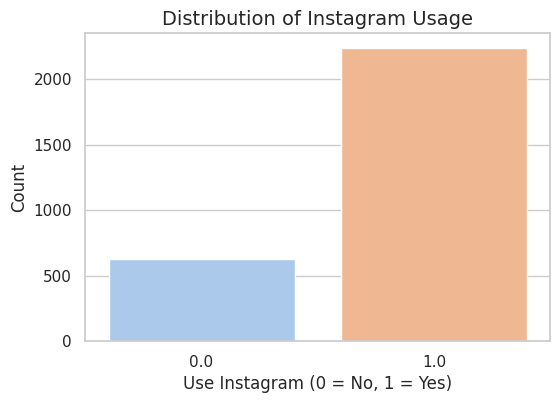

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Use Instagram", hue="Use Instagram", palette="pastel", legend=False)
plt.title("Distribution of Instagram Usage", fontsize=14)
plt.xlabel("Use Instagram (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The plot shows Instagram usage distribution: most students use Instagram (1), while fewer do not (0). One invalid entry (11) was detected, which should be corrected during preprocessing.

In [ ]:
print("Unique values in Use Instagram:", df["Use Instagram"].unique())

invalid_count = df[df["Use Instagram"] == 11].shape[0]
print("Number of invalid entries (11):", invalid_count)

Unique values in Use Instagram: [ 1.  0. nan]
Number of invalid entries (11): 0


☹

**Imputation -Binary- (mode/ median)**

In [ ]:
# impute Gender and Use Instagram with mode
for col in ["Gender","Use Instagram"]:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(col, "NaN filled with mode:", mode_val)

# impute Impact on Academic Performance with median (rounded)
median_val = round(df["Impact on Academic Performance"].median())
df["Impact on Academic Performance"] = df["Impact on Academic Performance"].fillna(median_val)
print("Impact on Academic Performance NaN filled with median:", median_val)

Gender NaN filled with mode: 1.0
Use Instagram NaN filled with mode: 1.0
Impact on Academic Performance NaN filled with median: 3


- We used mode to impute missing values in categorical columns (such as Gender and Use Instagram), because it represents the most frequent value and preserves the original distribution of the data

- For the target column (Impact on Academic Performance), we used the median since it is more suitable for ordinal data (Likert scale) and is less affected by outliers. We also applied the round() function to ensure the imputed value is an integer between 1 and 5

**Outliers Handling -Numric-(Age - IQR)**

In [ ]:
Q1= df["Age"].quantile(0.25)
Q3= df["Age"].quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1-1.5 *IQR
upper_bound = Q3 + 1.5 *IQR


df_cleaned =df[(df["Age"]>= lower_bound)&(df["Age"]<= upper_bound)]
print("Shape Before removing :",df.shape)
print("Shape After removing :", df_cleaned.shape)

Shape Before removing : (2862, 47)
Shape After removing : (2778, 47)


- We applied the IQR method to detect and remove outliers in the Age column. A total of 84 records were identified as outliers (ages above 23, including an extreme value of 48). These rows were removed to reduce noise and ensure that the dataset better represents the actual distribution of students. The dataset size decreased slightly, but this has minimal impact compared to the benefit of having cleaner data

----جزئية ساره من هنا -----

**2.4 Manual feature selection**

In [ ]:

desired_cols = [
    "Age",
    "Gender",
    "Year of Study",
    "Use Instagram",
    "Use Twitter",
    "Use Snapchat",
    "Use Tiktok",
    "Time Spent",
    "Academic Purpose",
    "Entertainment",
    "Social Interaction",
    "Addiction",
    "Difficulty in Concentrating on Studies",
    "Impact on Academic Performance",  # target
]


existing = [c for c in desired_cols if c in df.columns]
missing  = [c for c in desired_cols if c not in df.columns]

print("Shape before manual selection:", df.shape)
print("Missing columns (check spelling / caps):", missing)

df_model = df[existing].copy()

print("Shape after manual selection :", df_model.shape)
print("Final kept columns:", list(df_model.columns))


Shape before manual selection: (2862, 47)
Missing columns (check spelling / caps): []
Shape after manual selection : (2862, 14)
Final kept columns: ['Age', 'Gender', 'Year of Study', 'Use Instagram', 'Use Twitter', 'Use Snapchat', 'Use Tiktok', 'Time Spent', 'Academic Purpose', 'Entertainment', 'Social Interaction', 'Addiction', 'Difficulty in Concentrating on Studies', 'Impact on Academic Performance']


In [ ]:
df_model.head()

,Age,Gender,Year of Study,Use Instagram,Use Twitter,Use Snapchat,Use Tiktok,Time Spent,Academic Purpose,Entertainment,Social Interaction,Addiction,Difficulty in Concentrating on Studies,Impact on Academic Performance
0,16,2.0,2,1.0,0,0,0,1,1,0,0,0,1,1.0
1,19,1.0,3,1.0,1,1,0,1,1,1,1,1,1,3.0
2,18,2.0,4,0.0,0,0,0,1,1,0,0,0,1,1.0
3,20,1.0,3,0.0,1,1,0,4,0,0,0,1,5,1.0
4,20,2.0,3,1.0,1,1,0,2,1,1,1,0,4,3.0


**2.5 Encode categorical features**

We converted categorical variables into numeric dummy columns to be usable by ML models.


**2.8 Standardization (for clustering & models sensitive to
scale)**

**2.9 Save final datasets**